In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
# https://www.youtube.com/watch?v=k6nLfCbAzgo
# https://github.com/AvverbioPronome/10h/blob/master/Lesson4-5_ODE_2BODY_NBODY_MOON.ipynb

In [2]:
def sir_derivatives(sir, t, transm, recov):
    S, I, R = sir
    S1 = - transm * S * I
    I1 = transm * S * I - recov * I
    R1 = recov * I
    return np.array([S1, I1, R1])

In [3]:
S0, I0, R0 = [.99, .01, 0]
transm = .02
recov = .005
max_time=1000

In [4]:
t = np.linspace(0,max_time)
sol=integrate.odeint(sir_derivatives, [S0, I0, R0], t, args=(transm, recov))

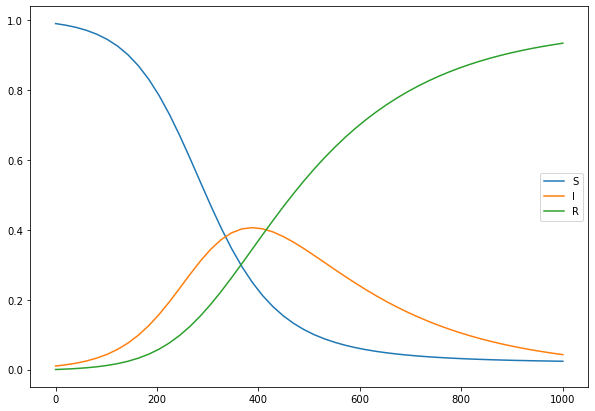

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(t,sol)
ax.legend(['S', 'I', 'R'])
fig.show()

In [6]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, datetime

dati=pd.read_json("./data/dati-json/dpc-covid19-ita-regioni.json", convert_dates=["data"])
dati['data'] = dati['data'].apply(lambda x: x.tz_localize('Europe/Rome'))
dati=dati.groupby('data').sum()

population = 60e6
dati['S'] = population - dati['totale_casi']
dati['I'] = dati['totale_positivi']
dati['R'] = dati['deceduti'] + dati['dimessi_guariti']

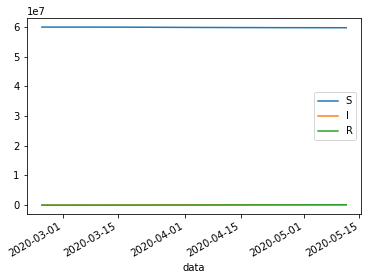

In [7]:
ax=dati.plot(y=['S', 'I', 'R'])
#ax.semilogy()